# Lab 3: Quantization


## Exercise 0: Simple Manual Quantization

Here, you are provided a 4x3 tensor of float32 values.

In [ ]:
small_tensor = torch.Tensor([[ 0.22,  0.52,  0.13],
        [ 0.29, 1.00,  0.73],
        [ 0.44, 0.00,  0.33],
        [ 0.59,  0.97,  0.78]])

### A. Affine Quantization

First, quantize the tensor into two-bit integer precision, with a quantized range from 0 to 3, inclusive. Provide the values of the result below:

*You should be able to do this step by hand!*


In [ ]:
answer_1a = torch.Tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0,  0, 0]])

*Hint: note the min and max values of the provided tensor, and try calculating the scaling factor and zero point rather than relying solely on your intuitions*

### B. Dequantization

Now, dequantize your quantized values back into the original float32 space of (0.0, 1.0). Provide the values of the result below:

*You should be able to do this step by hand!*

In [ ]:
answer_1b = torch.Tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0,  0, 0]])



### C. Discussion

Discuss any interesting observations you made. Was anything unintuitive? Surprising?

***YOUR ANSWER HERE***:

### D. Quantization Error

Calculate and report quantization error as a 4x3 tensor, as simply the absolute difference between the dequantized values and the original.

In [ ]:
answer_1d = torch.Tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0,  0, 0]])


## Exercise 1: Implement Quantization

Now, we will implement quantization of PyTorch Tensors.

In [ ]:
! pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

### 1. Calculate Scale and Zero Point for a single Tensor.
In this section, implement affine quantization as described in Lecture 6 where we will be quantizing from  `torch.Tensor` in `float32` to 8-bit `uint8 torch.Tensors`.

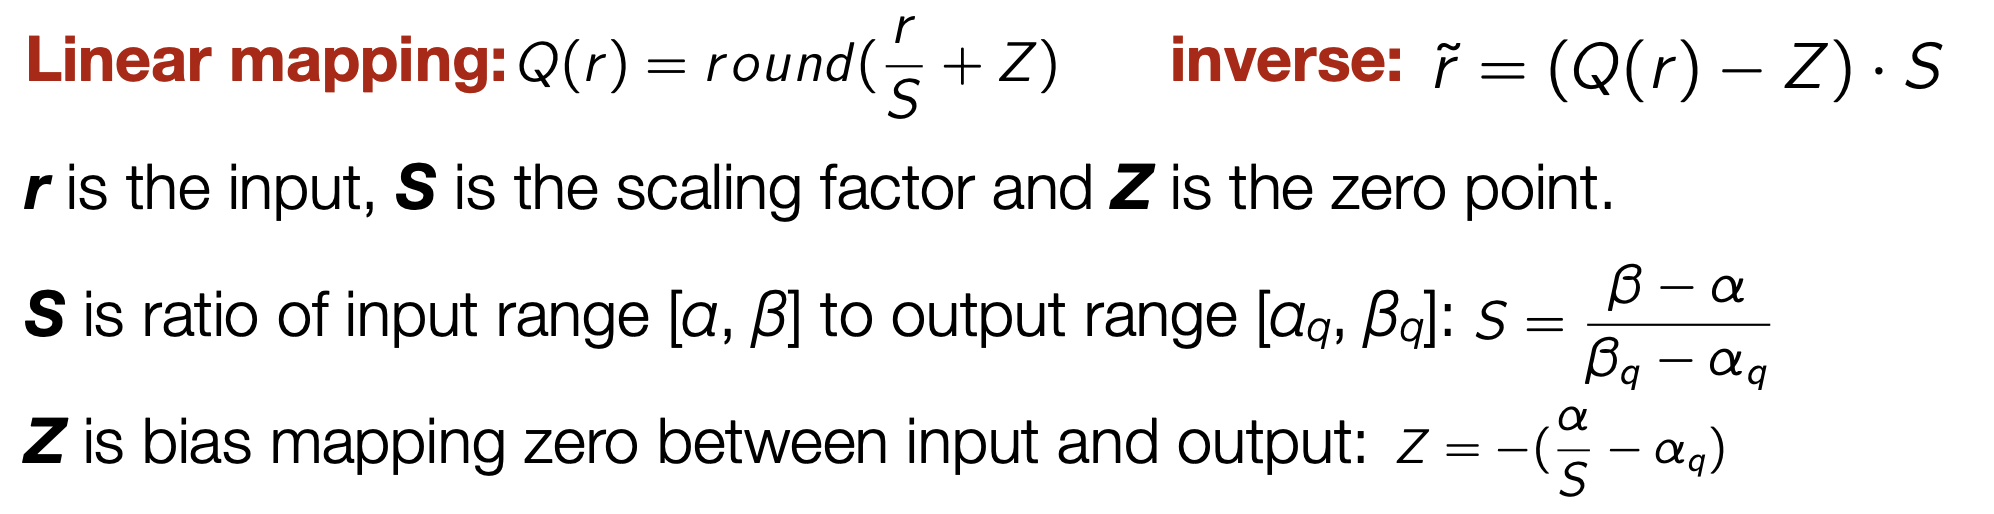

First implement a function which calculates the float `scale` and int `zeropoint` values.

In [ ]:
import torch
from typing import Tuple

def _calculate_scale_and_zeropoint(
    min_val: float, max_val: float, num_bits: int) -> Tuple[float, int]:
    raise NotImplementedError()



### 2. Quantization and Dequantization

1. Implement quantization to convert a `torch.fp32` Tensor to unsigned `torch.uint8`.
2. Implement dequantization to convert the `torch.uint8` tensor to `torch.fp32`.

#### Question
A. Given, a number of quantization bits $q$, minimum weight value $a$, and maximum weight value $b$; what is the largest possible quantization for a single weight during quantization? Assume there is no numeric overflow.


In [ ]:
def quantize(x: torch.Tensor, scale: float, zero_point: int, dtype=torch.uint8):
   # raise NotImplementedError()
    inv_scale = 1.0 / scale
    return torch.clamp(torch.round(x * inv_scale) + zero_point,
                       0, 255).to(dtype)

def dequantize(x: torch.Tensor, scale: float, zero_point: int):
    # raise NotImplementedError()
    return (x.to(torch.float32) - zero_point) * scale


### 3. Validate the Implementation

1. Now run your quantization implementation, the dequantized values from your implementation should exactly match the test cases.
2. Empirically, what is the average quantization error? maximum quantization error?
3. Save the original fp32 tensor and quantized tensor to disk with `torch.save`. Report the difference in disk utilization, does this meet expectations?

Hint: If you observe a small difference in the dequantized values, consider what happens to values when rounding or the effects of limited dynamic range of the `uint8` datatype.

In [ ]:
from copy import deepcopy

def test_case_0():
  torch.manual_seed(999)
  test_input = torch.randn((4,4))

  min_val, max_val = torch.min(test_input), torch.max(test_input)
  scale, zero_point = _calculate_scale_and_zeropoint(min_val, max_val, 8)

  your_quant = quantize(test_input, scale, zero_point)
  your_dequant = dequantize(your_quant, scale, zero_point)

  test_case_0 = torch.Tensor([
      [-0.2623,  1.3991,  0.2842,  1.0275],
      [-0.9838, -3.4104,  1.4866,  0.2405],
      [ 1.4866, -0.3716,  0.0874,  2.1424],
      [ 0.6340, -1.1587, -0.7870,  0.0656]])

  assert torch.allclose(your_dequant, test_case_0, atol=1e-4)
  assert torch.allclose(your_dequant, test_input, atol=5e-2)


### Test Case 1
def test_case_1():
  torch.manual_seed(999)
  test_input = torch.randn((8,8))

  min_val, max_val = torch.min(test_input), torch.max(test_input)
  scale, zero_point = _calculate_scale_and_zeropoint(min_val, max_val, 8)

  your_quant = quantize(test_input, scale, zero_point)
  your_dequant = dequantize(your_quant, scale, zero_point)

  test_case_1 = torch.Tensor(
      [[-0.2623,  1.3991,  0.2842,  1.0275, -0.9838, -3.4104,  1.4866,  0.2405],
      [ 1.4866, -0.3716,  0.0874,  2.1424,  0.6340, -1.1587, -0.7870,  0.0656],
      [ 0.0000, -0.6558, -1.0056,  0.3061,  0.6340, -1.0931, -1.6178,  1.5740],
      [-1.7927,  0.6121, -0.7214,  0.6121,  0.3279, -1.5959, -0.5247,  0.3498],
      [-1.3773,  1.1149, -0.7870,  0.2842,  0.9182, -1.1805, -0.7433, -1.5522],
      [ 1.0056, -0.1093,  1.3991, -0.9182, -1.1805, -0.6777, -0.3061,  0.9838],
      [ 0.2186,  1.6396,  1.0712,  1.7489,  0.0874,  0.3498,  0.9838,  1.2024],
      [-0.3935, -0.6340,  1.9238,  1.2898,  0.0219,  0.3935,  1.4866, -0.9401]])

  assert torch.allclose(your_dequant, test_case_1, atol=1e-4)
  assert torch.allclose(your_dequant, test_input, atol=5e-2)

test_case_0()
test_case_1()


tensor(0.0219)
tensor(0.0219)


## Exercise 2: MNIST and SST
We will now examine the effects of post-training quantization (PTQ) on model compression. You will be looking at how three properties vary as a result of model quantization:
1. Model size (in memory)
2. Model accuracy
3. Model latency (small vs large batch)

The techniques we are exploring are:
1. Dynamic Quantization
2. Static Quantization

Values in our models will be quantized from `float32` to `float16` and `qint8`.
Due to hardware differences, several of the results in this lab are unlikely to directly transfer to others' settings.

Data, Models and Evaluation
----
Data, models and evaluation for this part of the assignment will build off the code you wrote for Lab 1 and Lab 2. You are encouraged (and expected) to re-use model and evaluation code from Labs 1 and 2 to complete this assignment. In particular, you may find the following components of your Labs 1/2 useful:
- Preprocessing code for MNIST or SST-2
- Model class definition
- Parameter count and latency timing code
- Training and evaluation code
  - You will run inference many more times than training during this lab, so the evaluation function is especially important. If you have not already, you may wish to integrate latency measurement functionality in your evaluation function. An example eval function might take in a model and dataloader and return both accuracy and total time used for inference.

**Models:**
For the models in this assignment you will experiment with variants of the feed-forward networks with ReLU activations that you implemented in Lab 1. You will again experiment with a computer vision model trained on MNIST, OR a text sentiment analysis model trained on SST-2. You should only train **one** model, corresponding to your Lab 1 MNIST/SST-2 model, except with hyperparameters defined as below.

### MNIST
Here are the model and training hyperparameters you should use for the Lab 3 MNIST model:

| hyperparameter  | value |
| --------------- | ----- |
| learning rate   | 0.001 |
| batch size      | 64    |
| hidden size     | 1024  |
| # hidden layers | 2     |
| training epochs | 2     |

You should also crop the input to 20x20 pixels at the center of the image.
Train and report its accuracy on the MNIST test set.
You should be able to get around 95% accuracy.

### SST-2
Here are the hyperparameters you should use for the Lab 3 SST-2 model:

| hyperparameter  | value |
| --------------- | ----- |
| learning rate   | 0.001 |
| batch size      | 64    |
| hidden size     | 256   |
| # hidden layers | 3     |
| training epochs | 2     |

For SST, you should threshold your vocabulary to the 5000 most frequent words in the vocabulary.
Train this model and report its accuracy on the SST development set. You should be able to get about 80% accuracy.

**Evaluation:**

In this lab you will be evaluating models in terms of model size and inference latency. For inference latency report the average
**inference** time and standard deviation measured over 5 runs. For model size, you should report both parameter counts (using your Lab 1 code) and size on disk (in MB), which can be measured using this function:

```
import os

def print_size_of_model(model, label=""):
    torch.save(model.state_dict(), "temp.p")
    size=os.path.getsize("temp.p")
    print("model: ",label,' \t','Size (MB):', size/1e6)
    os.remove('temp.p')
    return size
```
You can then compare model sizes:

```
f=print_size_of_model(ffn_mnist,"fp32")
q=print_size_of_model(quantized_mnist,"int8")
print("{0:.2f} times smaller".format(f/q))
```

**REPORT:**
Evaluate and report the inference latency of the model for batch sizes 1 and 64.
Report the size of the model.
This provides your baseline for comparison to quantization. You should fill out all the cells containing ? in the tables below.

| Task | Q  | dtype     | Size (MB) | (Params) | Accuracy | Latency B1 | B64 |
| ----- | -- | -----     | ---- | -------- | -------- | ---------- | --- |
| MNIST/SST | -- | `float32` |   ?   |     ?     |     ?       |  ?  |  ?    |

### Dynamic quantization in PyTorch  
----
First, you will apply dynamic quantization to your model. Follow the [PyTorch quantization tutorial](https://pytorch.org/tutorials/recipes/recipes/dynamic_quantization.html)
to implement PyTorch dynamic quantization for your model.

Quantize to both `float16` and `qint8` precision, and report your results.

**REPORT:**
Copy values from above and expand. You should fill out all the cells containing ? in the tables below, with the other cells coming from previous tables.

| Task | Q  | dtype     | Size (MB) | (Params) | Accuracy | Latency B1 | B64 |
| ----- | -- | -----     | ---- | -------- | -------- | ---------- | --- |
| MNIST/SST | -- | `float32` |      |          |            |     |      |
| MNIST/SST | D  | `float16` |  ?   |    ?     |      ?     |  ?  |   ?  |
| MNIST/SST | D  | `qint8`   |  ?   |    ?     |      ?     |  ?  |   ?  |


### Static quantization in PyTorch
----
Next, you'll perform static quantization using [prepare_fx](https://pytorch.org/docs/stable/generated/torch.quantization.quantize_fx.prepare_fx.html) from [torch.quantization](https://pytorch.org/docs/stable/quantization-support.html).  

**REPORT:**
Copy values from above and expand two new lines:

| Task | Q  | dtype     | Size (MB) | (Params) | Accuracy | Latency B1 | B64 |
| ----- | -- | -----     | ---- | -------- | -------- | ---------- | --- |
| MNIST/SST | -- | `float32` |      |          |            |     |      |
| MNIST/SST | D  | `float16` |      |          |            |     |      |
| MNIST/SST | D  | `qint8`   |      |          |            |     |      |
| MNIST/SST | S  | `qint8`   |  ?   |    ?     |     ?      |  ?  |   ?  |


## Exercise 3: Quantize Your Class Project

### A. Reporting preliminaries

Briefly but clearly describe your project, including:
- hardware specs (along with OS and relevant software/tooling)
- model
- data

### B. Discussing quantization with respect to your project

Take a look at [PyTorch's Introduction to Quantization](https://pytorch.org/blog/introduction-to-quantization-on-pytorch/#choosing-an-approach) and describe how quantization can be incorporated into your project. Justify the type of quantization you plan to use, anchored in the model, hardware, details provided above.

### C. Quantizing your model, on your device

Apply a form of quantization to the model you are planning to use for your course project, on the target device.

1. Report {non-quantized, quantized} x {validation set accuracy, inference latency, model size}. Discuss/compare.
2. If you were unable to quantize your model, discuss sources of difficulty and challenges in implementation or deployment. *Note: This situation will be rare and requires detailed technical justification.*

## **Discussion:**

Preliminary Observations
----
0. Describe and discuss your observations, reported in the table that you generated in Exercise 2, and/or the results that you generated in Exercise 3.
You might analyze differences across quantization precisions, static vs dynamic, tasks, models, or something else that you noticed.
Choose **two** axes of interest and discuss each in more detail.

Overall discussion and future work
----
1. **Describe one observation you made** while completing this assignment that you found most interesting or surprising.
2. Now, **pose a follow-up question related to this observation** (a research question or hypothesis) that is unanswered by the work in this assignment,
and;
3. **Describe in detail an experiment of set of experiments that you might perform** in order to answer that question. You do not need to run the experiments, just describe how you might go about answering or at least helping to elicidate an answer to the question.


## Extra Credit:
----
This assignment includes two opportunities for extra credit.

### 1. Benchmarking mixed precision training [0.5 points]
Add an additional comparison to your results table using [automatic mixed precision training](https://pytorch.org/tutorials/recipes/recipes/amp_recipe.html).
This requires access to appropriate hardware that supports mixed-precision training (either a personal or lab GPU or via Colab).

This should add 4 lines to your table: one for each model and dataset. You don't need to use the same hardware here as above, just clearly specify either way.

### 2. Module-by-module sensitivity analysis [2 points]
[Start here](https://pytorch.org/blog/quantization-in-practice/#sensitivity-analysis).
1. Analyze accuracy and inference time in both Lab 2 models from quantizing just one module or layer at a time. Your results will depend in part on the structure of your model; looping through the `named_modules` as in the documentation code will include modules as well as "leaf" layers.
2. Analyze accuracy and inference time in both Lab 2 models from quantizing *all but one* layer at a time. *Hint: you should loop through only modules that do not have child modules themselves*

### 3. Quantize your Feedforward models from Lab 1 to Int8 Using Your Implementation from Exercise 1
1. The `QuantizedLinear` nn.module provided below can be used as a replacement for `nn.Linear`. Methods for loading quantized weights are provided in the class definition -- the module accepts `qint8` weights and `fp32` biases.
2. Analyze the performance and latency of your implementation as compared with PyTorch's native quantization methods.


In [ ]:
import torch
from torch import nn
from typing import Optional


torch.backends.quantized.engine = 'fbgemm'
torch.manual_seed(0)


class QuantizedLinear(nn.Module):
  """ Adapted from: https://github.com/pytorch/pytorch/blob/main/torch/ao/nn/quantized/modules/linear.py"""
  def __init__(self, in_features, out_features, scale=1.0, zero_point=0,, bias=True, dtype=torch.qint8):
    super().__init__()

    self.in_features = in_features
    self.out_features = out_features
    bias = None

    self.scale = 1.0
    self.zero_point = zero_point

    bias = torch.zeros(out_features, dtype=torch.float)
    weight_q8 = torch._empty_affine_quantized(
        [out_features, in_features], scale=1, zero_point=0, dtype=torch.qint8)

    self._packed_params = torch.ops.quantized.linear_prepack(weight_q8, bias)

  def set_weight_bias(self, weight_q8, bias):
    self._packed_params = torch.ops.quantized.linear_prepack(weight_q8, bias)

  def forward(self, x_quint8):
    return torch.ops.quantized.linear(
        x_quint8, self._packed_params, self.scale, self.zero_point)

  ### Nothing to See Here
  def _weight_bias(self):
      return self._packed_params._weight_bias()

  def weight(self):
      return self._weight_bias()[0]

  def bias(self):
      return self._weight_bias()[1]

  def set_weight_bias(self, w: torch.Tensor, b: Optional[torch.Tensor]) -> None:
      self._packed_params.set_weight_bias(w, b)

  def _save_to_state_dict(self, destination, prefix, keep_vars):
      super()._save_to_state_dict(destination, prefix, keep_vars)
      destination[prefix + 'scale'] = torch.tensor(self.scale)
      destination[prefix + 'zero_point'] = torch.tensor(self.zero_point)

  def _load_from_state_dict(self, state_dict, prefix, local_metadata, strict,
                            missing_keys, unexpected_keys, error_msgs):
      self.scale = float(state_dict[prefix + 'scale'])
      state_dict.pop(prefix + 'scale')

      self.zero_point = int(state_dict[prefix + 'zero_point'])
      state_dict.pop(prefix + 'zero_point')

      super()._load_from_state_dict(
          state_dict, prefix, local_metadata, False,
          missing_keys, unexpected_keys, error_msgs)

In [ ]:
class YourFFModel(nn.Module):
  """
  Here is a template model utilizing the QuantizedLinear nn.Module
  """

  def __init__(self):
    super().__init__()
    self.layer1 = QuantizedLinear(in_features=256, out_features=256)
    self.layer2 = QuantizedLinear(in_features=256, out_features=10)

  def forward(self, input):
    out = self.q8_layer1(input)
    out = nn.functional.relu(out)
    out = self.q8_layer2(input)
    out = nn.functional.relu(out)
    return out

model = YourFFModel()





## Grading and submission (10 points + 2.5 extra credit)
----
Submit your answers to all the above questions to Canvas as a write-up in pdf format. This assignment is worth 10 points
(or 10% of your final grade for the class), distributed as follows:
- **Submission [2 points]:** Assignment is submitted on time.
- **Basic requirements [5 points]:** Answers to all the questions (including all requested tables) are included in the write-up.
- **Report [2 points]:** Report is well-written and organized with minimal typos and formatting mistakes, and answers to all requested questions are easy to find. Tables are readable and well-labeled. Your results should be easily reproducible from the details included in your report.
- **Thoughtful discussion [1 points]:** The discussion of results in your write-up is thoughtful: it indicates meaningful engagement with the exercise and it is clear that you put effort into thinking through and explaining your results.
- **Extra Credit [2.5 points]:** See above for description of possible extra credit.